<a href="https://colab.research.google.com/github/LVA0412/Python.Work3-varB/blob/main/Python3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Блок. Pandas**
Для следующих данных (csv-файл прилагается)

In [2]:
import pandas as pd #импортируем библиотеки
import math
import numpy as np
# Загрузим данные из файла
# переименуем столбцы, чтобы с ними стало удобнее работать
df = pd.read_csv('competition_1.csv', delimiter = ';')
df.rename(columns = {
          'Год рождения' : 'yearB', 
          'Бег 1000 метров, мин. и сек.' : 'run1000', 
          'Бег 30 метров, сек.' : 'run30',
          'Прыжок в длину с места, см ' : 'jump',
          }, inplace = True) 
print(df)

        Фамилия        Имя Пол  yearB run1000 run30  jump
0     Абдуллаев      Денис   м   1998    3,42  4,72   188
1     Абдуллаев      Темур   м   1999    5,12  5,63   187
2    Абраменцев  Владислав   м   1997    5,52  5,42   223
3     Абсалямов       Илья   м   1999    5,43  4,92   237
4       Авдонин  Александр   м   1998    4,38  4,71   219
..          ...        ...  ..    ...     ...   ...   ...
995        Янов      Артем   м   1998    5,25  5,73   188
996     Ярагина      Мария   ж   1997    4,02  5,72   216
997    Яруллина    Татьяна   ж   1997     3,3  4,27   208
998        Яцко       Иван   м   1996    4,22  5,06   183
999       Яшина      Мария   ж   1999    3,55  6,86   192

[1000 rows x 7 columns]


In [3]:
# Приведем в порядок типы данных
df['run1000'] = df['run1000'].str.replace(',','.')
df['run30'] = df['run30'].str.replace(',','.')
df = df.astype({'run1000': np.float64})
df = df.astype({'run30': np.float64})
df = df.astype({'yearB': np.int64})
df = df.astype({'jump': np.int64})

In [4]:
# Добавим столбец в котором результаты забега на 1000 м. в секундах
df["r1000_sec"] = df["run1000"].apply(np.floor) * 60 + (df["run1000"] - df["run1000"].apply(np.floor) ) * 100
#df["r10000m"] = df["run1000"].str.slice(0, 1)
#df["r10000s"] = df["run1000"].str.slice(2, 4)
#df = df.astype({'r10000m': np.int64})
#df = df.astype({'r10000s': np.int64})
print("Готовый для анализа датафрейм")
print(df)

Готовый для анализа датафрейм
        Фамилия        Имя Пол  yearB  run1000  run30  jump  r1000_sec
0     Абдуллаев      Денис   м   1998     3.42   4.72   188      222.0
1     Абдуллаев      Темур   м   1999     5.12   5.63   187      312.0
2    Абраменцев  Владислав   м   1997     5.52   5.42   223      352.0
3     Абсалямов       Илья   м   1999     5.43   4.92   237      343.0
4       Авдонин  Александр   м   1998     4.38   4.71   219      278.0
..          ...        ...  ..    ...      ...    ...   ...        ...
995        Янов      Артем   м   1998     5.25   5.73   188      325.0
996     Ярагина      Мария   ж   1997     4.02   5.72   216      242.0
997    Яруллина    Татьяна   ж   1997     3.30   4.27   208      210.0
998        Яцко       Иван   м   1996     4.22   5.06   183      262.0
999       Яшина      Мария   ж   1999     3.55   6.86   192      235.0

[1000 rows x 8 columns]


**Следует определить и вывести**

1.1)среднее значение и медиану бега на 1000 метров (мин, сек) по каждой возрастной группе (год рождения есть) по девочкам и мальчикам;



In [5]:
#Определим какие есть возрастные группы. 
#Сгруппируем участников по году рождения
df_ybg = df.groupby('yearB')['Фамилия'].count()
print(df_ybg)

yearB
1996    255
1997    235
1998    255
1999    255
Name: Фамилия, dtype: int64


In [6]:
#Вычислим средние значения
for x in range(1996, 2000, 1):
    t1 = df[(df['Пол']=='ж')&(df['yearB']== x )]['r1000_sec'].mean()
    minutes = int(t1 // 60)
    sec = int(t1 % 60)
    print('Среднее значение девочек' , x , 'года рождения, в беге на 1000 м.', 
    'минут:', minutes, 'секунд:', sec)
    t1 = df[(df['Пол']=='м')&(df['yearB']== x )]['r1000_sec'].mean()
    minutes = int(t1 // 60)
    sec = int(t1 % 60)
    print('Среднее значение мальчиков' , x , 'года рождения, в беге на 1000 м.', 
    'минут:', minutes, 'секунд:', sec)


Среднее значение девочек 1996 года рождения, в беге на 1000 м. минут: 4 секунд: 48
Среднее значение мальчиков 1996 года рождения, в беге на 1000 м. минут: 4 секунд: 50
Среднее значение девочек 1997 года рождения, в беге на 1000 м. минут: 4 секунд: 45
Среднее значение мальчиков 1997 года рождения, в беге на 1000 м. минут: 4 секунд: 50
Среднее значение девочек 1998 года рождения, в беге на 1000 м. минут: 4 секунд: 54
Среднее значение мальчиков 1998 года рождения, в беге на 1000 м. минут: 4 секунд: 51
Среднее значение девочек 1999 года рождения, в беге на 1000 м. минут: 4 секунд: 51
Среднее значение мальчиков 1999 года рождения, в беге на 1000 м. минут: 4 секунд: 48


In [7]:
#Вычислим медианные значения
for x in range(1996, 2000, 1):
    t1 = df[(df['Пол']=='ж')&(df['yearB']== x )]['r1000_sec'].median()
    minutes = int(t1 // 60)
    sec = int(t1 % 60)
    print('Медианное значение девочек' , x , 'года рождения, в беге на 1000 м.', 
    'минут:', minutes, 'секунд:', sec)
    t1 = df[(df['Пол']=='м')&(df['yearB']== x )]['r1000_sec'].median()
    minutes = int(t1 // 60)
    sec = int(t1 % 60)
    print('Медианное значение мальчиков' , x , 'года рождения, в беге на 1000 м.', 
    'минут:', minutes, 'секунд:', sec)

Медианное значение девочек 1996 года рождения, в беге на 1000 м. минут: 4 секунд: 45
Медианное значение мальчиков 1996 года рождения, в беге на 1000 м. минут: 4 секунд: 47
Медианное значение девочек 1997 года рождения, в беге на 1000 м. минут: 4 секунд: 38
Медианное значение мальчиков 1997 года рождения, в беге на 1000 м. минут: 4 секунд: 48
Медианное значение девочек 1998 года рождения, в беге на 1000 м. минут: 4 секунд: 51
Медианное значение мальчиков 1998 года рождения, в беге на 1000 м. минут: 4 секунд: 43
Медианное значение девочек 1999 года рождения, в беге на 1000 м. минут: 4 секунд: 51
Медианное значение мальчиков 1999 года рождения, в беге на 1000 м. минут: 4 секунд: 47


1.2)определить победителей (фамилии и имена детей) в каждой возрастной группе по мальчикам
и по девочкам (3 первых места) по каждому виду. Учесть, что победителей может быть больше 3-х, так как результаты могут совпадать;


In [8]:
def sexname(s):
    if s == 'м':
        r = "мальчиков"
    else:
        r = "девочек"
    return r
def get3run1000(sex, year, pl):
    #Найдем граничный pl результат по бегу на 1000 м
    #среди мальчиков и девочек указанного года рождения
    df_run1000 = df.loc[(df['Пол'] == sex)  &(df['yearB']== year )]
    df_3run1000 = df_run1000.groupby(['r1000_sec']).agg(['count']) 
    r = df_3run1000.index[pl-1]
    return r

def get_best_runner1000(res, sex, year):
    #Найдем все результаты по бегу на 1000 м
    #Лучше <= res
    #среди мальчиков или девочек указанного года рождения
    df_best = df[(df['Пол'] == sex) & (df['yearB'] == year) & (df['r1000_sec'] <= res)]
    return df_best.sort_values('r1000_sec')
s = ['м', 'ж']
y = [1996, 1997, 1998, 1999]
print("Результаты соревнований по бегу на 1000 м.")
for i in s:
    for j in y:
          print("Победители среди", sexname(i), j, "года рождения")
          print(get_best_runner1000(get3run1000(i, j, 3), i, j))

Результаты соревнований по бегу на 1000 м.
Победители среди мальчиков 1996 года рождения
      Фамилия     Имя Пол  yearB  run1000  run30  jump  r1000_sec
144    Бурсов  Никита   м   1996     3.28   5.23   178      208.0
101  Бессонов  Кирилл   м   1996     3.30   4.66   231      210.0
129   Бохонов   Антон   м   1996     3.33   4.19   225      213.0
Победители среди мальчиков 1997 года рождения
     Фамилия      Имя Пол  yearB  run1000  run30  jump  r1000_sec
920  Чеканов  Евгений   м   1997     3.28   5.86   195      208.0
266  Дроздов     Петр   м   1997     3.30   5.72   228      210.0
276    Дюкин   Никита   м   1997     3.32   4.17   198      212.0
561  Меликов   Кирилл   м   1997     3.32   5.92   205      212.0
Победители среди мальчиков 1998 года рождения
      Фамилия      Имя Пол  yearB  run1000  run30  jump  r1000_sec
318  Зеленцов   Андрей   м   1998     3.28   4.61   226      208.0
289      Еров  Алексей   м   1998     3.30   5.90   232      210.0
729    Руйбис   Никита  

In [9]:
def get3run30(sex, year, pl):
    #Найдем граничный pl результат по бегу на 30 м
    #среди мальчиков и девочек указанного года рождения
    df_run30 = df.loc[(df['Пол'] == sex)  &(df['yearB']== year )]
    df_3run30 = df_run30.groupby(['run30']).agg(['count']) 
    r = df_3run30.index[pl-1]
    return r

def get_best_runner30(res, sex, year):
    #Найдем все результаты по бегу на 30 м
    #Лучше <= res
    #среди мальчиков или девочек указанного года рождения
    df_best = df[(df['Пол'] == sex) & (df['yearB'] == year) & (df['run30'] <= res)]
    return df_best.sort_values('run30')
s = ['м', 'ж']
y = [1996, 1997, 1998, 1999]
print("Результаты соревнований по бегу на 30 м.")
for i in s:
    for j in y:
          print("Победители среди", sexname(i), j, "года рождения")
          print(get_best_runner30(get3run30(i, j, 3), i, j))

Результаты соревнований по бегу на 30 м.
Победители среди мальчиков 1996 года рождения
      Фамилия        Имя Пол  yearB  run1000  run30  jump  r1000_sec
482  Курбатов  Александр   м   1996     4.58   4.02   221      298.0
676  Платонов   Гахраман   м   1996     4.37   4.03   187      277.0
536   Малютин     Микаэл   м   1996     3.43   4.06   184      223.0
552   Мастяев       Арзу   м   1996     5.27   4.06   201      327.0
916       Цой     Никита   м   1996     5.08   4.06   201      308.0
Победители среди мальчиков 1997 года рождения
      Фамилия    Имя Пол  yearB  run1000  run30  jump  r1000_sec
245   Демидов  Антон   м   1997     5.12   4.01   220      312.0
206  Горбатюк  Антон   м   1997     4.57   4.02   197      297.0
148    Бывших  Рубен   м   1997     4.58   4.03   221      298.0
Победители среди мальчиков 1998 года рождения
       Фамилия        Имя Пол  yearB  run1000  run30  jump  r1000_sec
817   Стукалов      Борис   м   1998     3.43   4.02   218      223.0
390    

In [10]:
def get3jump(sex, year, pl):
    #Найдем граничный pl результат по прыжкам
    #среди мальчиков и девочек указанного года рождения
    df_3jump = df.loc[(df['Пол'] == sex)  &(df['yearB']== year )]
    df_3jump = df_3jump.groupby(['jump']).agg(['count'])
    r = df_3jump.index[-pl]
    return r

def get_best_jump(res, sex, year):
    #Найдем все результаты по прыжкам
    #Лучше >= res
    #среди мальчиков или девочек указанного года рождения
    df_bestJ = df[(df['Пол'] == sex) & (df['yearB'] == year) & (df['jump'] >= res)]
    return df_bestJ.sort_values('jump', ascending=False)
s = ['м', 'ж']
y = [1996, 1997, 1998, 1999]
print("Результаты соревнований по прыжкам в длину")
for i in s:
    for j in y:
          print("Победители среди", sexname(i), j, "года рождения")
          print(get_best_jump(get3jump(i, j, 3), i, j))

Результаты соревнований по прыжкам в длину
Победители среди мальчиков 1996 года рождения
       Фамилия        Имя Пол  yearB  run1000  run30  jump  r1000_sec
582   Молчанов     Виктор   м   1996     5.42   5.25   237      342.0
806  Станкевич  Александр   м   1996     5.28   5.41   236      328.0
384  Кильдишов     Никита   м   1996     4.38   4.45   235      278.0
607   Нерсисян   Владимир   м   1996     5.53   4.79   235      353.0
652   Парфенов    Дмитрий   м   1996     5.32   4.18   235      332.0
Победители среди мальчиков 1997 года рождения
        Фамилия        Имя Пол  yearB  run1000  run30  jump  r1000_sec
291       Ершов  Владислав   м   1997     4.25   4.93   237      265.0
523       Лунев       Петр   м   1997     5.28   5.60   237      328.0
470     Кузьмин    Ярослав   м   1997     4.23   5.86   235      263.0
317  Зборовский    Алексей   м   1997     4.48   5.46   234      288.0
Победители среди мальчиков 1998 года рождения
         Фамилия      Имя Пол  yearB  run100

1.3)определить в каждой возрастной группе девочек, которые по трём видам (по всем) испытаний
входят в ТОП5;

In [12]:
for i in y:
    run30_top5 = get3run30('ж',i,5)
    run1000_top5 = get3run1000('ж',i,5)
    jump_top5 = get3jump('ж',i,5)
    #print(run30_top5, run1000_top5, jump_top5)
    df_best_girl = df.loc[(df['Пол'] == 'ж' ) &
             (df['yearB'] == i) &
             (df['jump'] >= jump_top5) &
             (df['run30'] <= run30_top5) &
             (df['r1000_sec'] <= run1000_top5)
             ]
    if len(df_best_girl) == 0:
        print("В возрастной группе ", i, "года рождения, нет девочек, которые",
              "по всем трём видам испытаний входят в ТОП5")
    else:
        print("Список девочек в возрастной группе ", i, "года рождения, которые",
              "по всем трём видам испытаний входят в ТОП5")
        print(df_best_girl)

В возрастной группе  1996 года рождения, нет девочек, которые по всем трём видам испытаний входят в ТОП5
В возрастной группе  1997 года рождения, нет девочек, которые по всем трём видам испытаний входят в ТОП5
В возрастной группе  1998 года рождения, нет девочек, которые по всем трём видам испытаний входят в ТОП5
В возрастной группе  1999 года рождения, нет девочек, которые по всем трём видам испытаний входят в ТОП5


Блок. MatplotLib
Создать две Фигуры для графиков, состоящий из нескольких областей (контейнеров). Тип и
решаемая задача – любые.

In [13]:
# Загрузим данные по респространению Covid-19 в Алтайском крае
df_covid = pd.read_csv('ak.csv', delimiter = ';')
#df_covid['Дата'] = pd.to_datetime(df_covid['Дата'], format="%d.%m.%Y")
print(df_covid)

      Unnamed: 0        Дата          Регион  Заражений  Выздоровлений  \
0          61412  2020-03-12  Алтайский край          0              0   
1          19258  2020-03-13  Алтайский край          0              0   
2          61668  2020-03-14  Алтайский край          0              0   
3          33462  2020-03-15  Алтайский край          0              0   
4          76174  2020-03-16  Алтайский край          0              0   
...          ...         ...             ...        ...            ...   
998        31757  2022-12-05  Алтайский край     313914         304520   
999        73936  2022-12-06  Алтайский край     314002         304641   
1000       31309  2022-12-07  Алтайский край     314095         304762   
1001       74029  2022-12-08  Алтайский край     314191         304881   
1002       31468  2022-12-09  Алтайский край     314288         304957   

      Смертей  Смертей за день  Заражений за день  Выздоровлений за день  
0           0                0      

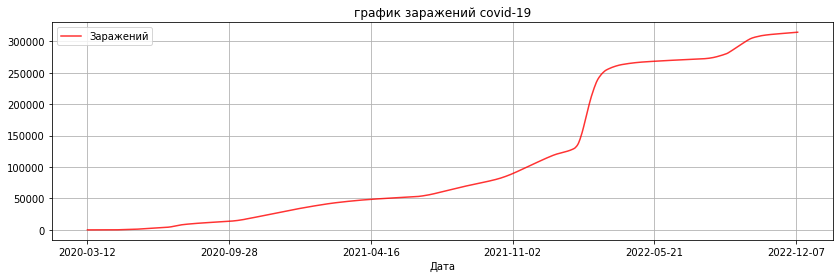

In [14]:
figure_a = df_covid.plot(figsize=(14, 4), x="Дата", y="Заражений", alpha=0.8, color = "red", grid = True, title = "график заражений covid-19")


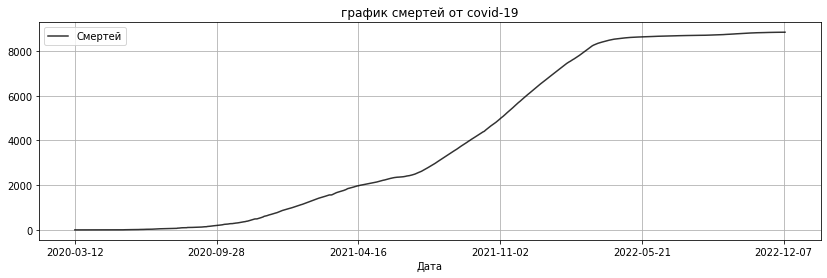

In [15]:
figure_b = df_covid.plot(figsize=(14, 4), x="Дата", y="Смертей", alpha=0.8, color = "black", grid = True, title = "график смертей от covid-19")

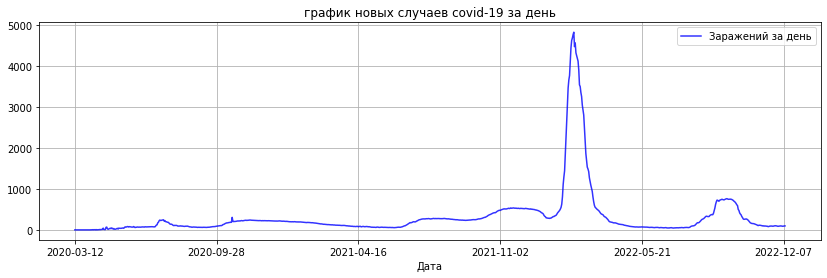

In [16]:
figure_с = df_covid.plot(figsize=(14, 4), x="Дата", y="Заражений за день", alpha=0.8, color = "blue", grid = True, title = "график новых случаев covid-19 за день")

Блок. Seaborn
Создать три скрипичных диаграммы: категориальная переменная – год рождения, пол, год
рождения и пол (hue)

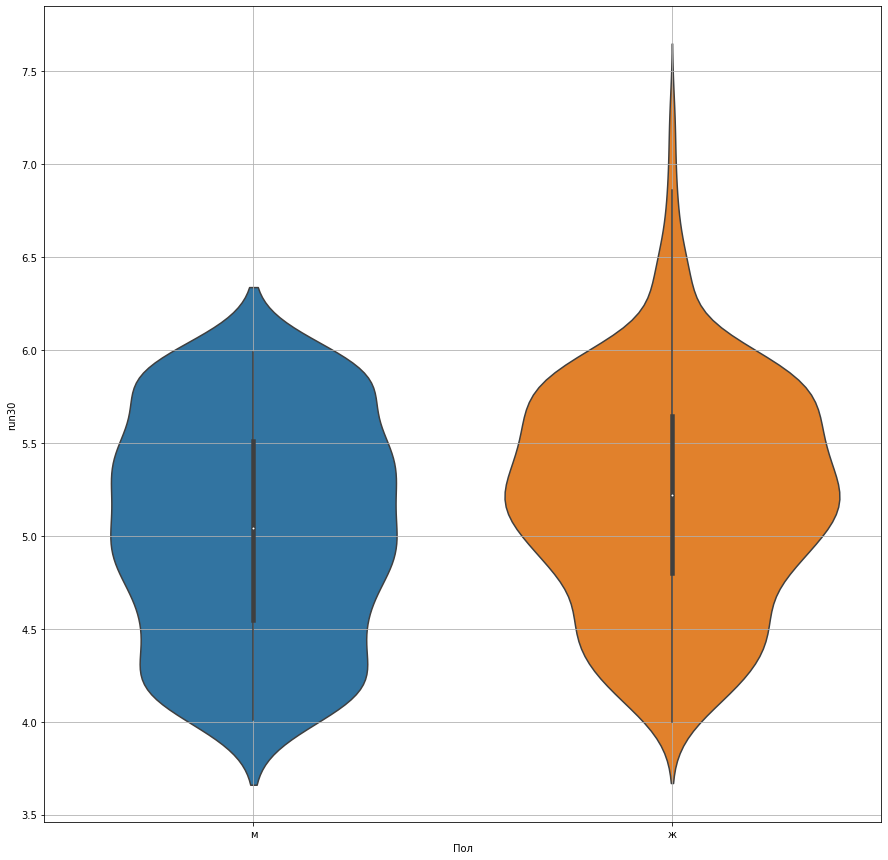

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,15))
sns.violinplot(x="Пол", y="run30", data=df)
plt.grid(True)
plt.show()

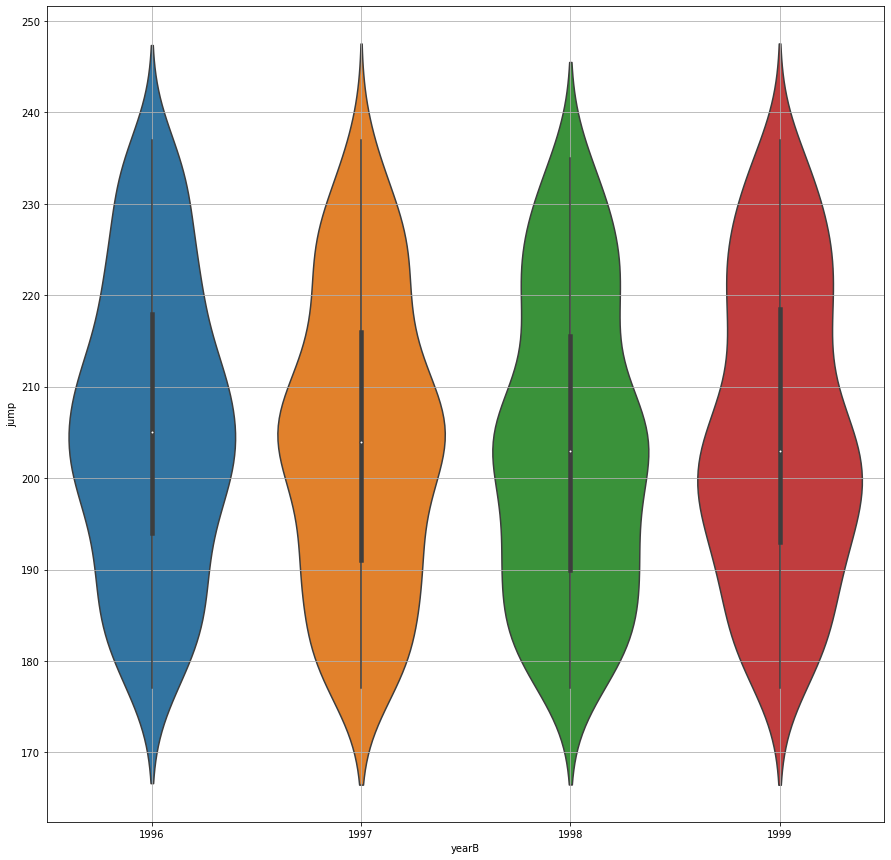

In [18]:
plt.figure(figsize=(15,15))
sns.violinplot(x="yearB", y="jump", data=df)
plt.grid(True)
plt.show()

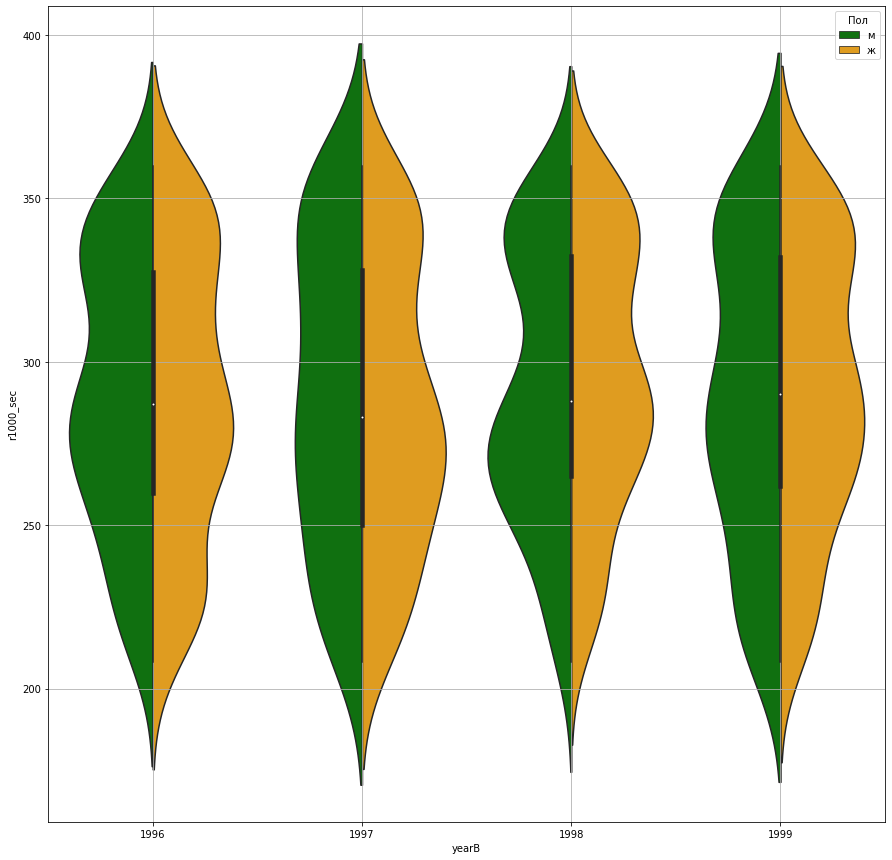

In [19]:
plt.figure(figsize=(15,15))
sns.violinplot(x="yearB", y="r1000_sec", data=df, hue="Пол", split=True, palette = ['green', 'orange'])
plt.grid(True)
plt.show()